In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix
import missingno as msno
import sklearn as sns

%matplotlib inline

In [4]:
data = pd.read_csv("booking_of_hotel.csv")

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [43]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Checking empty data

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Empty Data

<AxesSubplot:>

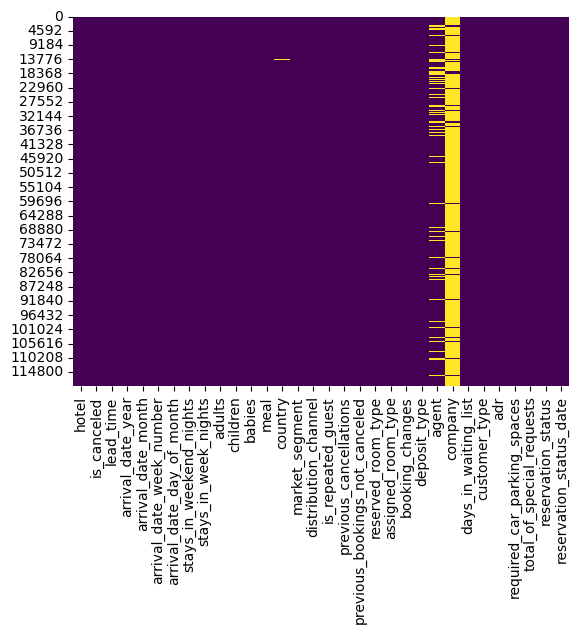

In [10]:
# Visualize missing data using a heatmap
sb.heatmap(data.isnull(),cbar=False,cmap='viridis')

### Reservations by month

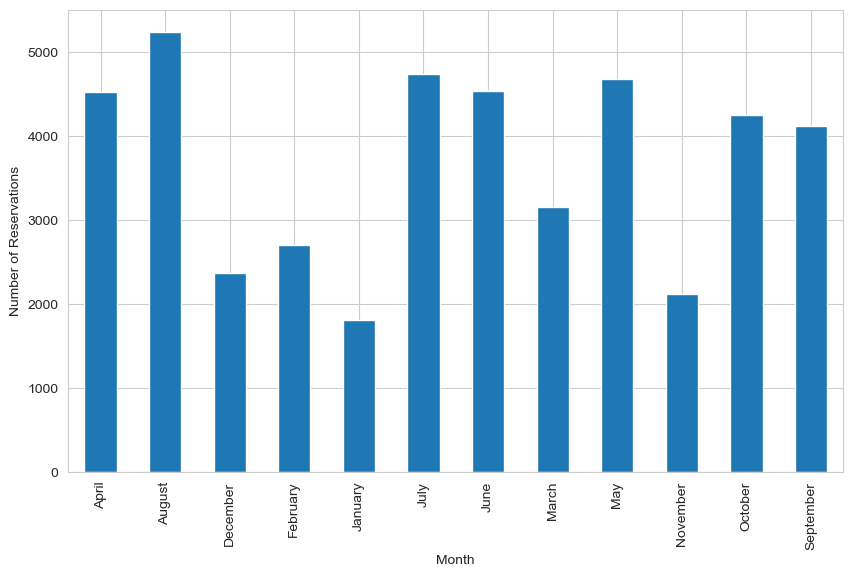

In [25]:
# Group the reservations by month and sum the total number of reservations for each month
monthly_reserves = data.groupby('arrival_date_month')['is_canceled'].sum()

# Create the bar plot of monthly reserves
ax = monthly_reserves.plot(kind='bar', figsize=(10, 6))

# Set the x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Number of Reservations')

# Show the plot
plt.show()


### Count reservation for hotel types

In [12]:
# Get the counts of unique values in the 'hotel' column
hotel_counts = data['hotel'].value_counts()

# Print the counts of unique values
print(hotel_counts)


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


### Percentage of cancelations

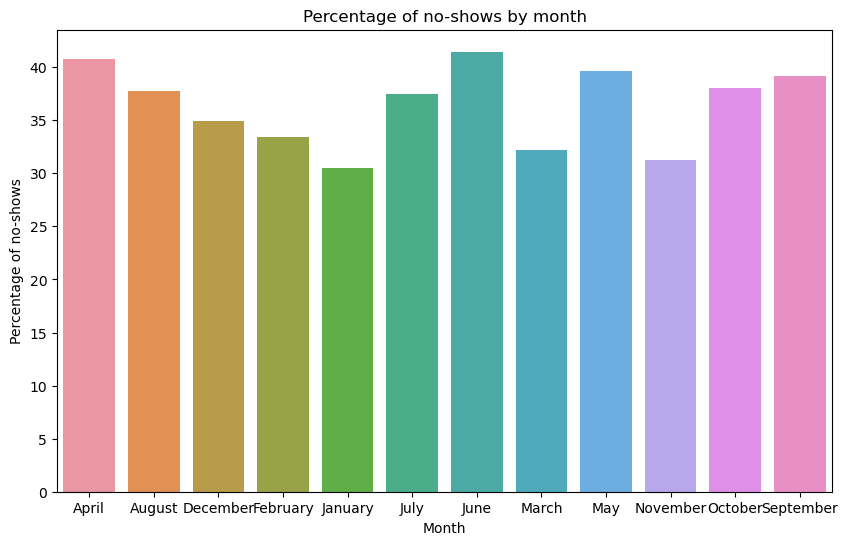

In [13]:
# Create a DataFrame with the total number of no-shows by month
canceled_reserves = data[data['is_canceled'] == 1].groupby('arrival_date_month')['is_canceled'].count()

# Create a DataFrame with the total number of reservations by month
total_reservations = data.groupby('arrival_date_month')['hotel'].count()

# Calculate the percentage of no-shows per month
canceled_reserves_percentage = (canceled_reserves / total_reservations) * 100

# Create a bar plot of the percentage of no-shows by month
plt.figure(figsize=(10, 6))
sb.barplot(x=canceled_reserves_percentage.index, y=canceled_reserves_percentage.values)
plt.xlabel('Month')
plt.ylabel('Percentage of cancelations')
plt.title('Percentage of cancelations by month')
plt.show()


### Number of Hotel Reserves by Month and Type

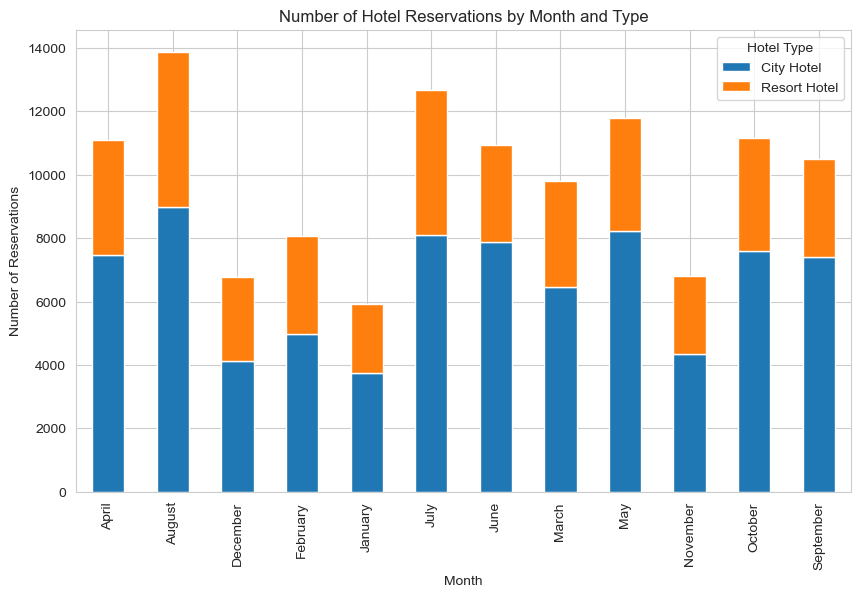

In [42]:
# Group the data by arrival month and hotel type, and count the number of reservations
monthly_bookings = data.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='count')

# Create a pivot table to reshape the data
monthly_bookings = monthly_bookings.pivot(index='arrival_date_month', columns='hotel', values='count')

# Create the stacked bar plot
monthly_bookings.plot(kind='bar', stacked=True, figsize=(10,6))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.title('Number of Hotel Reservations by Month and Type')
plt.legend(title='Hotel Type', loc='upper right')
plt.show()




### Percentage of Bookings by year

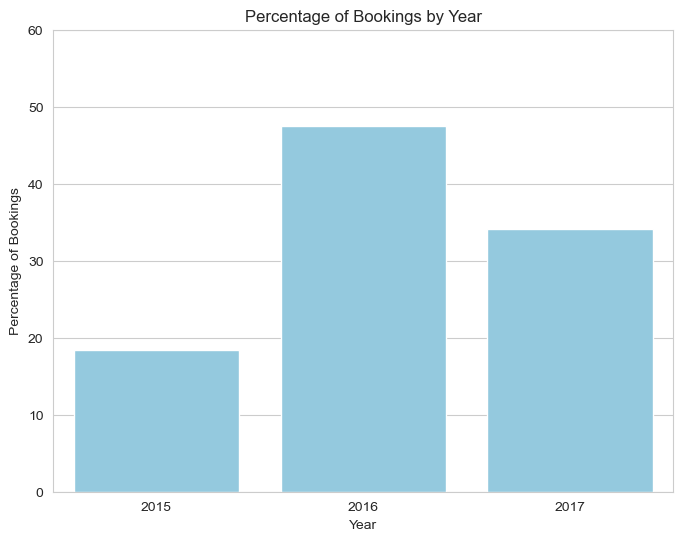

In [20]:
# Group the data by arrival_date_year and count the total number of bookings
yearly_bookings = data.groupby('arrival_date_year')['hotel'].count()

# Calculate the percentage of bookings for each year
yearly_bookings_pct = (yearly_bookings / yearly_bookings.sum()) * 100

sb.set_style('whitegrid')

# Create a bar chart of the percentage of bookings for each year
plt.figure(figsize=(8,6))
sb.barplot(x=yearly_bookings_pct.index, y=yearly_bookings_pct, color='skyblue')
plt.title('Percentage of Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Bookings')
plt.ylim(0, 60)
plt.show()

### Busiest Months

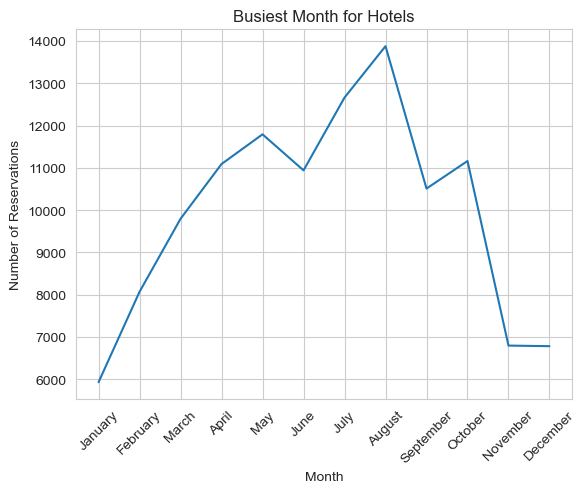

In [26]:
# Group the data by month and count the number of reservations for each month
monthly_bookings = data.groupby('arrival_date_month')['hotel'].count().reset_index()

# Convert the month names to their numerical equivalent
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_bookings['month_num'] = pd.Categorical(monthly_bookings['arrival_date_month'], categories=month_order, ordered=True)
monthly_bookings = monthly_bookings.sort_values('month_num')

# Plot a line chart of the monthly bookings
sns.lineplot(x='arrival_date_month', y='hotel', data=monthly_bookings)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.title('Busiest Month for Hotels')
plt.show()


### Most booked accommodation types

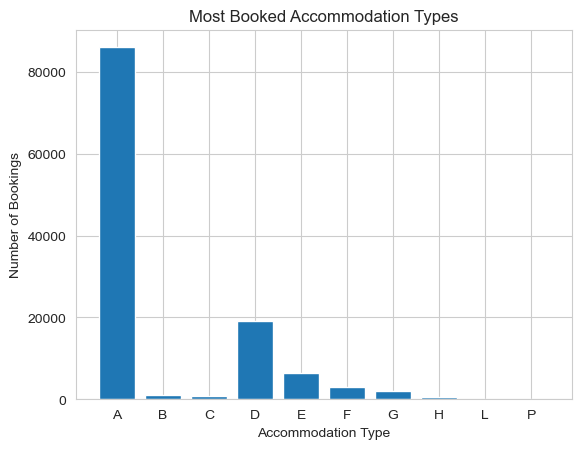

In [38]:
# Group the data by reserved room type and count the number of occurrences
accommodation_counts = data.groupby('reserved_room_type')['reserved_room_type'].count()

# Plot the results as a bar plot
plt.bar(accommodation_counts.index, accommodation_counts.values)
plt.xlabel('Accommodation Type')
plt.ylabel('Number of Bookings')
plt.title('Most Booked Accommodation Types')
plt.show()


### Country most guests come from

<AxesSubplot:>

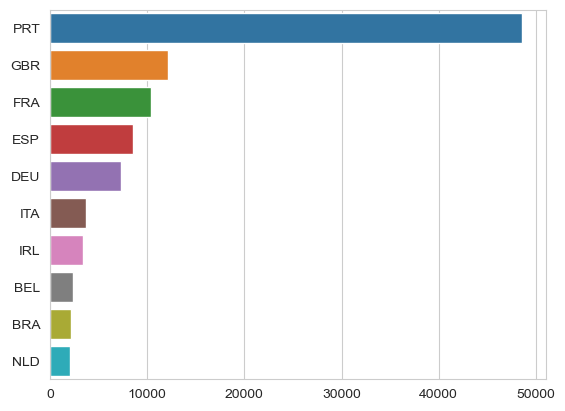

In [29]:
# Create a horizontal bar chart of the top 10 countries by number of guests
top_countries = data['country'].value_counts().nlargest(10)
sb.barplot(x=top_countries.values, y=top_countries.index, orient='h')
